Zadání:
V jednom ze cvičení jste probírali práci s moduly pro vizualizaci dat. Mezi nejznámější moduly patří matplotlib (a jeho nadstavby jako seaborn), pillow, opencv, aj. Vyberte si nějakou zajímavou datovou sadu na webovém portále Kaggle a proveďte datovou analýzu datové sady. Využijte k tomu různé typy grafů a interpretujte je (minimálně alespoň 5 zajímavých grafů)​. Příklad interpretace: z datové sady pro počasí vyplynulo z liniového grafu, že v létě je vyšší rozptyl mezi minimální a maximální hodnotou teploty. Z jiného grafu vyplývá, že v létě je vyšší průměrná vlhkost vzduchu. Důvodem vyššího rozptylu může být absorpce záření vzduchem, který má v létě vyšší tepelnou kapacitu.


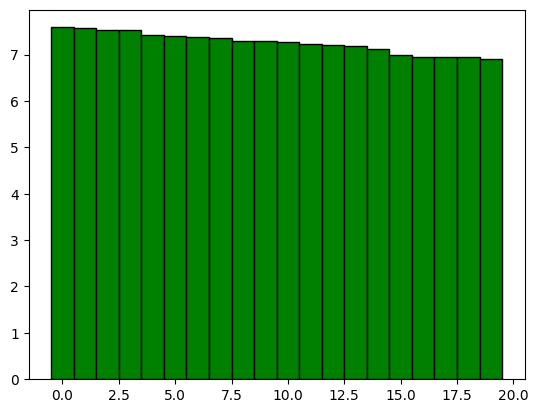

0              Switzerland
1                  Iceland
2                  Denmark
3                   Norway
4                   Canada
5                  Finland
6              Netherlands
7                   Sweden
8              New Zealand
9                Australia
10                  Israel
11              Costa Rica
12                 Austria
13                  Mexico
14           United States
15                  Brazil
16              Luxembourg
17                 Ireland
18                 Belgium
19    United Arab Emirates
Name: country, dtype: object


In [1]:


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

data = pd.read_csv('WHR_2015.csv')

zeme = data['country'][:20]
pocet_prvku = len(zeme) 
indexy = []
for i in range(len(zeme)):
    indexy.append(i)
sirka = 1.00
hapipiness = data['happiness_score'][:20]

plt.bar(indexy, hapipiness , sirka, color = 'green', edgecolor = 'black', label = 'country')                


plt.show()
print(zeme)

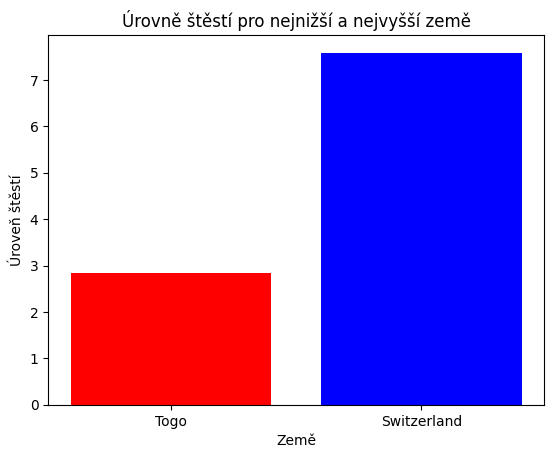

In [2]:

data = pd.read_csv('WHR_2015.csv')

# max a min indexy
min_happiness_index = data['happiness_score'].idxmin()
max_happiness_index = data['happiness_score'].idxmax()

# zeme s min a max indeksy
min_happiness_country = data.loc[min_happiness_index, 'country']
max_happiness_country = data.loc[max_happiness_index, 'country']

# kresleni grafu 
plt.bar([min_happiness_country, max_happiness_country], [data.loc[min_happiness_index, 'happiness_score'], data.loc[max_happiness_index, 'happiness_score']], color=['red', 'blue'])
plt.xlabel('Země')
plt.ylabel('Úroveň štěstí')
plt.title('Úrovně štěstí pro nejnižší a nejvyšší země')
plt.show()

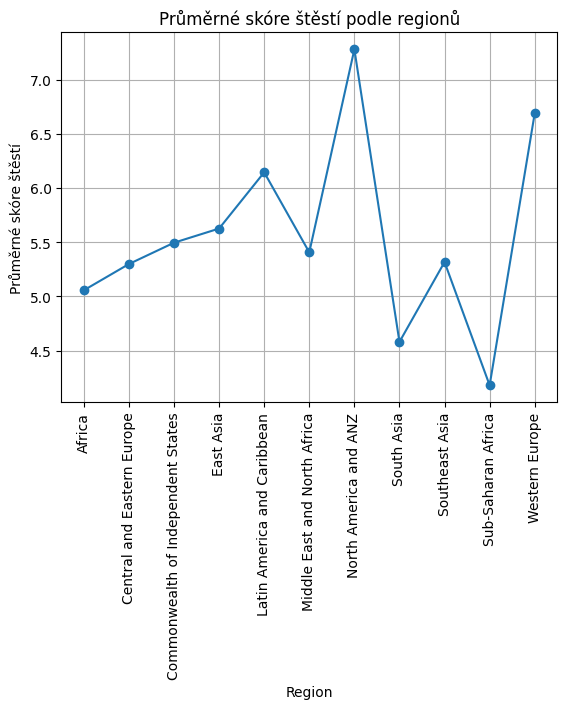

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('WHR_2015.csv')

# prumer podle regionu 
region_happiness = data.groupby('region')['happiness_score'].mean().reset_index()

# kresleni grafu
plt.plot(region_happiness['region'], region_happiness['happiness_score'], marker='o', linestyle='-')
plt.xlabel('Region')
plt.ylabel('Průměrné skóre štěstí')
plt.title('Průměrné skóre štěstí podle regionů')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()


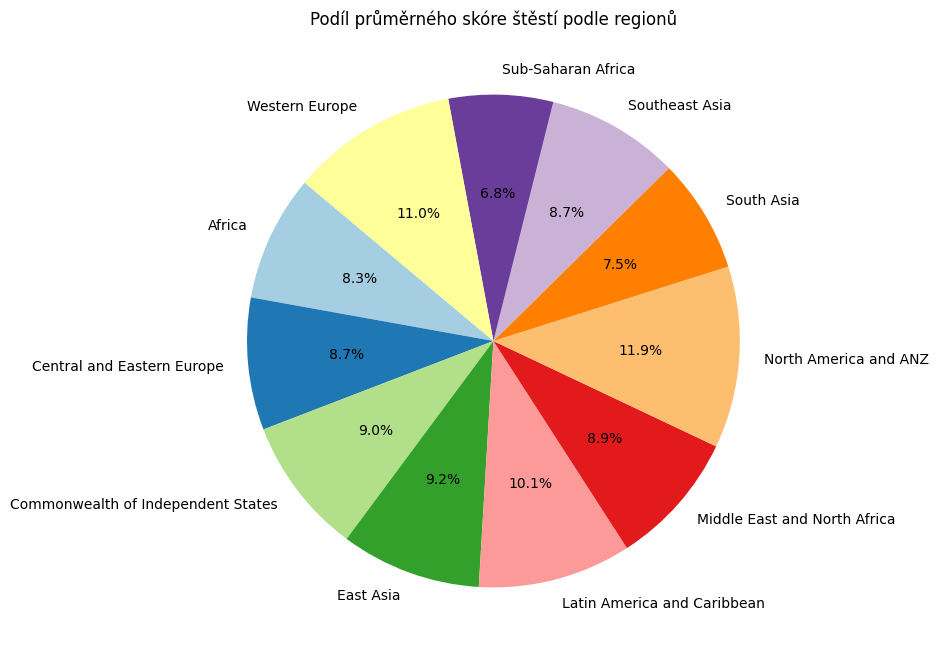

In [4]:

data = pd.read_csv('WHR_2015.csv')


region_happiness = data.groupby('region')['happiness_score'].mean().reset_index()


plt.figure(figsize=(8, 8))
plt.pie(region_happiness['happiness_score'], labels=region_happiness['region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Podíl průměrného skóre štěstí podle regionů')
plt.show()



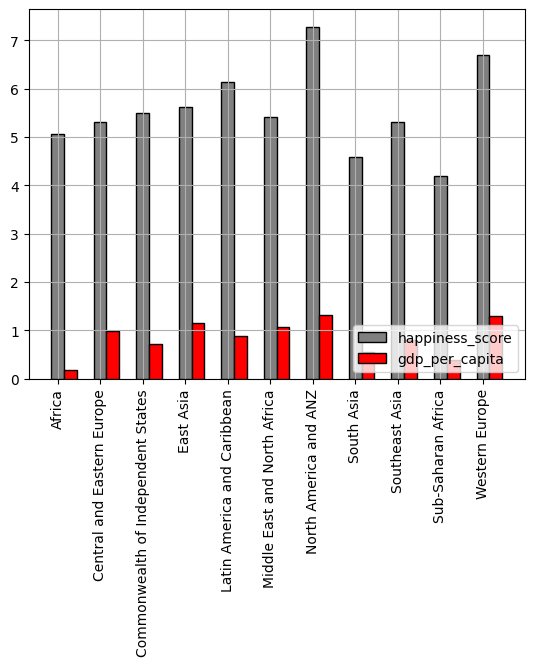

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('WHR_2015.csv')

region_happiness = data.groupby('region')['happiness_score'].mean().reset_index()
region_gdp = data.groupby('region')['gdp_per_capita'].mean().reset_index()


regions = pd.Categorical(region_happiness['region'], categories=region_happiness['region'].unique(), ordered=True)

region_happiness['region'] = regions
region_gdp['region'] = regions


width = 0.3
plt.bar(region_happiness['region'], region_happiness['happiness_score'], width, color='gray', edgecolor='black', label='happiness_score' )
plt.bar(region_gdp['region'].cat.codes + width, region_gdp['gdp_per_capita'], width, color='red', edgecolor='black', label='gdp_per_capita' )

plt.xticks(region_happiness['region'], rotation='vertical')
plt.grid(True)
plt.legend(loc="lower right") 
plt.show()
